In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier

from training_utils import prepare_dataset, print_metrics

random_seed = 42

In [3]:
Xtrain, ytrain, Xval, yval, sample_weight = prepare_dataset()
print(f"Training samples: {Xtrain.shape[0]}, Validation samples: {Xval.shape[0]}")

Training samples: 4976, Validation samples: 247


In [16]:
param_grid = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, 7),
    "min_samples_leaf": range(1, 5),
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = DecisionTreeClassifier(random_state=random_seed, **params)
    clf.fit(Xtrain, ytrain, sample_weight=sample_weight)

    yval_pred = clf.predict(Xval)
    accuracy = accuracy_score(yval, yval_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Validation Accuracy: 0.6923076923076923


Accuracy: 0.6923076923076923
Confusion Matrix:
[[95 26]
 [50 76]]
F1 Score: 0.6666666666666666
Best Threshold (Youden's J statistic): 0.6278276791560246


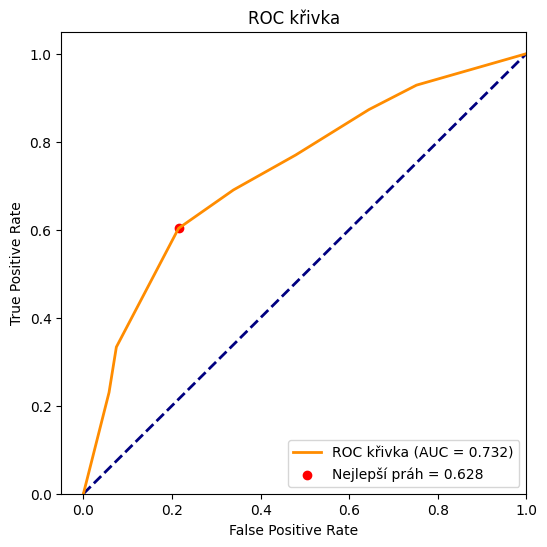

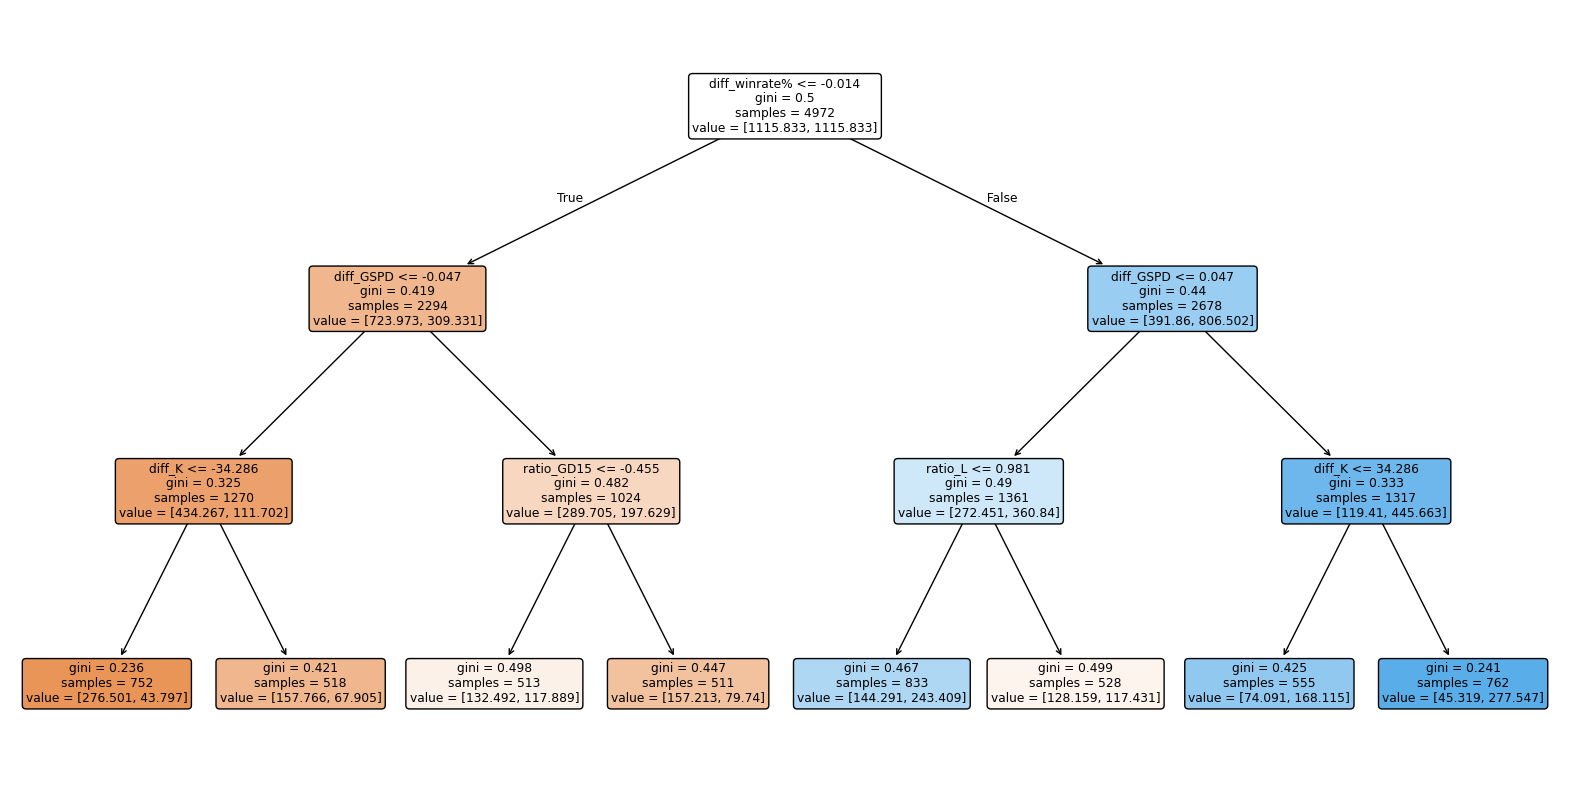

In [17]:
clfRF = DecisionTreeClassifier(random_state=random_seed, **best_params)
clfRF.fit(Xtrain, ytrain, sample_weight=sample_weight)

yval_pred = clfRF.predict(Xval)
yval_proba = clfRF.predict_proba(Xval)[:, 1]

print_metrics(yval, yval_pred, yval_proba)

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clfRF,
    feature_names=list(Xtrain.columns),
    filled=True,
    rounded=True,
)
plt.show()

In [11]:
date = val["date"].max()
date

'2025-09-28'